This notebook if demonstation for challenge Vietnamese NLP Dataset for Continual Learning. In the past, underthesea team is only focused on tuning model. In this project, we create a simple challenge for ourselves to build a continuous learning NLP system.

## The August 2021 Challenges Vietnamese NLP Dataset for Continual Learning

The August 2021 Challenges are [part-of-speech tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging) and [dependency parsing](https://universaldependencies.org/).

### Create environment

In [1]:
%load_ext autoreload
%autoreload 2

# add project folder
import os
from os.path import dirname, join
PROJECT_FOLDER = dirname(dirname(os.getcwd()))
os.sys.path.append(PROJECT_FOLDER)

# add dependencies
from underthesea.utils.col_analyzer import UDAnalyzer, computeIDF
from underthesea.utils.col_script import UDDataset
from IPython.display import display, display_png
from wordcloud import WordCloud
from PIL import Image
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# init folder
DATASETS_FOLDER = join(PROJECT_FOLDER, "datasets")
COL_FOLDER = join(DATASETS_FOLDER, "UD_Vietnamese-COL")
raw_file = join(COL_FOLDER, "corpus", "raw", "202108.txt")

Load dictionary with 31327 words.


### Datasets

In [2]:
%%capture
raw_file = join(COL_FOLDER, "corpus", "raw", "202108.txt")
generated_dataset = UDDataset.load_from_raw_file(raw_file)

ud_file = join(COL_FOLDER, "corpus", "ud", "202108.txt")
ud_dataset = UDDataset.load(ud_file)

generated_dataset.merge(ud_dataset)
dataset = generated_dataset

dataset.write(ud_file)

In [3]:
analyzer = UDAnalyzer()

In [4]:
analyzer.analyze_dataset_len(dataset)
words_pos = analyzer.analyze_words_pos(dataset)
punctuations = set(words_pos[words_pos['pos'] == 'CH']['word'])

Number of sentences 795


In [5]:
sent_ids = analyzer.analyze_sent_ids(dataset)

In [6]:
doc_sents = analyzer.analyze_doc_sent_freq(dataset)

Number of doc URLs 72


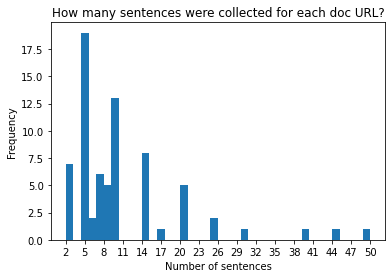

In [7]:
x = [item[1] for item in doc_sents]
plt.hist(x, bins=40)
plt.xticks(np.arange(min(x), max(x)+1, 3))
plt.title("How many sentences were collected for each doc URL?")
plt.xlabel("Number of sentences")
plt.ylabel("Frequency")
plt.show()

#### Stopwords using IDF

In [8]:
doc_word_freqs = analyzer.get_doc_word_counters(dataset).values()
idfs = computeIDF(doc_word_freqs)
print("Words with lowest IDFs are candidates for Stopwords!")
stopwords_idf = {k: v for k, v in sorted(dict(idfs).items(), key=lambda x: x[1])[:40]}
stopwords_idf

Words with lowest IDFs are candidates for Stopwords!


{',': 0.0,
 '.': 0.0,
 'và': 0.07918124604762482,
 'của': 0.10914446942506807,
 'là': 0.12493873660829993,
 'được': 0.12493873660829993,
 'cho': 0.12493873660829993,
 'trong': 0.1330566268304794,
 'với': 0.1413291527964693,
 'các': 0.1413291527964693,
 'người': 0.1671364164027548,
 'đã': 0.1671364164027548,
 'có': 0.185234638495551,
 'từ': 0.1945746647496944,
 'này': 0.21387981994508107,
 'để': 0.21387981994508107,
 'theo': 0.22386404085168196,
 'không': 0.23408320603336796,
 'nhiều': 0.24454863971153296,
 'đến': 0.24454863971153296,
 'một': 0.25527250510330607,
 'cũng': 0.25527250510330607,
 'ở': 0.26626788940476925,
 'vào': 0.2891307723642735,
 'đó': 0.3010299956639812,
 'những': 0.3010299956639812,
 'khi': 0.3010299956639812,
 '(': 0.3010299956639812,
 ')': 0.3010299956639812,
 'việc': 0.3132644520809928,
 'về': 0.3258535793890133,
 'tại': 0.33881855655338095,
 'phải': 0.3521825181113625,
 'ngày': 0.3521825181113625,
 'sẽ': 0.3659708025969958,
 'trên': 0.3659708025969958,
 'năm': 0.

#### Stopwords using Kullback-Leibler divergence

In [9]:
from underthesea.datasets import stopwords
stopwords.words

['có',
 'của',
 'trong',
 'các',
 'được',
 'đến',
 'và',
 'nhiều',
 'này',
 'một',
 'chỉ',
 'đó',
 'sẽ',
 'số',
 'để',
 'đã',
 'ở',
 'những',
 'vào',
 'qua',
 'đi',
 'không',
 'là',
 'ra',
 'mà',
 'khi',
 'rằng',
 'từ',
 'năm',
 'rất',
 'hay',
 'tại',
 'sau',
 'bị',
 'đều',
 'vẫn',
 'lần',
 'như',
 'đồng',
 'mình',
 'còn',
 'xảy',
 'đợt',
 'theo',
 'hiện',
 'tuy nhiên',
 '10',
 'gì',
 'tới',
 'lại',
 'về',
 '2',
 '']

### Actionable Insights

We want to explore:

* What is word frequencies?
* What is word frequencies today?
* How many words in this corpus?
* What are out of vocabulary words?

#### What are words

In [10]:
counter = analyzer.analyze_words(dataset)

Most common words:
 [('và', 258), ('của', 230), ('các', 210), ('trong', 186), ('cho', 180), ('người', 178), ('được', 167), ('với', 155), ('không', 152), ('là', 148), ('có', 148), ('đã', 143), ('để', 136), ('đến', 130), ('những', 108), ('một', 104), ('ngày', 102), ('này', 96), ('từ', 96), ('nhiều', 89), ('khi', 89), ('ở', 86), ('theo', 78), ('về', 76), ('vào', 75), ('cũng', 74), ('trên', 68), ('phải', 66), ('tại', 66), ('bị', 66), ('việc', 64), ('anh', 64), ('2', 62), ('đó', 62), ('sẽ', 62), ('năm', 58), ('sau', 56), ('như', 54), ('ông', 54), ('lại', 54), ('số', 52), ('ra', 52), ('đang', 51), ('thông tin', 50), ('tôi', 50), ('biết', 48), ('mình', 47), ('cả', 46), ('hơn', 46), ('điểm', 46)]
Corpus words:  2886
Noun phrases:
 {'Việt Nam', 'Uwe Seeler', 'Tứ', 'TT&TT Đà Nẵng', 'Đảng', 'Exbucklandioideae', 'A00', 'CEO', 'Elo', 'Premier League', 'Vacxin', 'Haaland', 'Champions League', 'Rashford', 'Văn Hậu', 'Đài Loan', 'Michael Kokalari', 'Paris', 'PV VietNamNet', 'The', 'Munich', 'Phú Yên',

#### Remove some (potential) stopwords to get clearer Wordcloud

In [11]:
wordlist = [word for word in counter]
for word in wordlist:
    if word in stopwords_idf or word in punctuations:
        del counter[word]

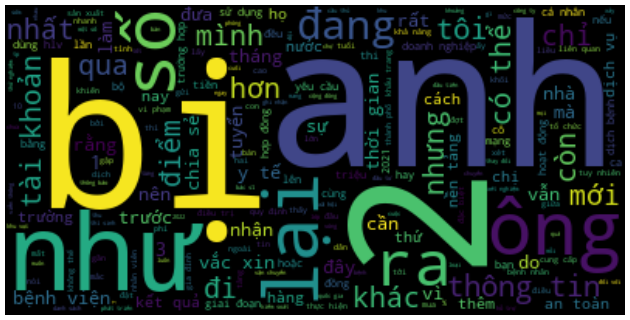

In [12]:
w1 = WordCloud().generate_from_frequencies(counter)
plt.figure(figsize=(16, 12), dpi=50)
plt.imshow(w1, interpolation="bilinear")
plt.axis("off")
plt.show()

Beautiful word cloud for most frequencies words in this corpus.

#### What are today words?

In [13]:
counter = analyzer.analyze_today_words(dataset)

Most common words:
 [('và', 69), ('trong', 54), ('cho', 52), ('được', 45), ('của', 43), ('đã', 43), ('người', 43), ('có', 38), ('các', 37), ('vắc xin', 36), ('với', 33), ('ngày', 33), ('để', 29), ('không', 29), ('tại', 27), ('là', 27), ('bị', 25), ('việc', 25), ('đến', 24), ('một', 22), ('nhiều', 22), ('2', 21), ('này', 21), ('sẽ', 21), ('về', 21), ('ở', 21), ('ca', 21), ('biết', 20), ('y tế', 20), ('bệnh viện', 19), ('anh', 18), ('giai đoạn', 18), ('trên', 17), ('tiền', 17), ('theo', 17), ('từ', 16), ('điều trị', 16), ('triệu', 15), ('cũng', 15), ('khi', 15), ('liều', 15), ('tháng', 14), ('hơn', 14), ('do', 14), ('thêm', 14), ('nước', 14), ('mắc', 14), ('lại', 13), ('những', 13), ('nhận', 13)]
Corpus words:  1200
Noun phrases:
 {'Việt Nam', 'Loài', 'ECMO', 'Long An', 'Hoàng Liên-Văn Bàn', 'Hà Giang', 'Exbucklandioideae', 'Đồng Nai', 'CEO', 'Nhơn Hải', 'HCDC', 'Hạnh', 'Chun', 'Mô Thức Khẩu', 'Viện', 'Vacxin', 'Ea Kruế', 'Ngọc Châu Á', 'California', 'Kuindersma', 'Viettel Post', 'Phú Yê

#### Remove some (potential) stopwords to get clearer Wordcloud

In [14]:
wordlist = [word for word in counter]
for word in wordlist:
    if word in stopwords_idf or word in punctuations:
        del counter[word]

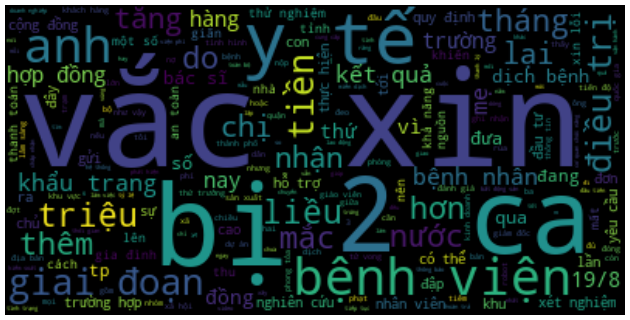

In [15]:
w1 = WordCloud().generate_from_frequencies(counter)
plt.figure(figsize=(16, 12), dpi=50)
plt.imshow(w1, interpolation="bilinear")
plt.axis("off")
plt.show()

## How to Contribute?

It's great that you find this project interesting. Even the smallest contribute is appreciated. Welcome to this exciting journey with us.

### You can contribute in so many ways!

* [Create more usefull open datasets](https://github.com/undertheseanlp/underthesea/tree/master/datasets/UD_Vietnamese-COL)
* [Create more actionable insights](https://github.com/undertheseanlp/underthesea/tree/master/datasets/UD_Vietnamese-COL)